In [1]:
import sys
sys.path.append("../")

In [2]:
import pandas as pd
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
from utilities_functions.ri_calculator import find_smallest_variation_to_change
import deepmatcher as dm
import torch

In [5]:
attributes =['title','category','brand','modelno','price']

In [4]:
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('../models/walmartamazon_hybrid2.pth')
model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (title): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(
    

In [8]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('../Structured/Walmart-Amazon/'
                                                                         ,'test_negatives.csv',32,model,
                                                                        model.classifier)

In [10]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('../Structured/Walmart-Amazon',
                                                                       'test_positives.csv',32,model,
                                                                       model.classifier)

In [11]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))

In [19]:
classifier_length = 900
attribute_length = int(classifier_length/(len(attributes)))

In [20]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in negative_classifier_inputs:
    for sample_index in range(len(batch)):
        current_sample_ris = []
        for j,attribute in enumerate(attributes):
            print('Processing sample {} with attribute {}'.format(current_sample,attribute))
            it,variation = find_smallest_variation_to_change(model.classifier,classifier_length=classifier_length,
                                                             attribute_length=attribute_length,input_matrix=batch,
                                                             vector_index=sample_index,attributes=[j],class_to_reach=1)
            current_sample_ris.append(variation)
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0 with attribute title
Processing sample 0 with attribute category
Processing sample 0 with attribute brand
Processing sample 0 with attribute modelno
Processing sample 0 with attribute price
Processing sample 1 with attribute title
Processing sample 1 with attribute category
Processing sample 1 with attribute brand
Processing sample 1 with attribute modelno
Processing sample 1 with attribute price
Processing sample 2 with attribute title
Processing sample 2 with attribute category
Processing sample 2 with attribute brand
Processing sample 2 with attribute modelno
Processing sample 2 with attribute price
Processing sample 3 with attribute title
Processing sample 3 with attribute category
Processing sample 3 with attribute brand
Processing sample 3 with attribute modelno
Processing sample 3 with attribute price
Processing sample 4 with attribute title
Processing sample 4 with attribute category
Processing sample 4 with attribute brand
Processing sample 4 with attribute

Processing sample 38 with attribute modelno
Processing sample 38 with attribute price
Processing sample 39 with attribute title
Processing sample 39 with attribute category
Processing sample 39 with attribute brand
Processing sample 39 with attribute modelno
Processing sample 39 with attribute price
Processing sample 40 with attribute title
Processing sample 40 with attribute category
Processing sample 40 with attribute brand
Processing sample 40 with attribute modelno
Processing sample 40 with attribute price
Processing sample 41 with attribute title
Processing sample 41 with attribute category
Processing sample 41 with attribute brand
Processing sample 41 with attribute modelno
Processing sample 41 with attribute price
Processing sample 42 with attribute title
Processing sample 42 with attribute category
Processing sample 42 with attribute brand
Processing sample 42 with attribute modelno
Processing sample 42 with attribute price
Processing sample 43 with attribute title
Processing s

Processing sample 77 with attribute title
Processing sample 77 with attribute category
Processing sample 77 with attribute brand
Processing sample 77 with attribute modelno
Processing sample 77 with attribute price
Processing sample 78 with attribute title
Processing sample 78 with attribute category
Processing sample 78 with attribute brand
Processing sample 78 with attribute modelno
Processing sample 78 with attribute price
Processing sample 79 with attribute title
Processing sample 79 with attribute category
Processing sample 79 with attribute brand
Processing sample 79 with attribute modelno
Processing sample 79 with attribute price
Processing sample 80 with attribute title
Processing sample 80 with attribute category
Processing sample 80 with attribute brand
Processing sample 80 with attribute modelno
Processing sample 80 with attribute price
Processing sample 81 with attribute title
Processing sample 81 with attribute category
Processing sample 81 with attribute brand
Processing 

Processing sample 114 with attribute price
Processing sample 115 with attribute title
Processing sample 115 with attribute category
Processing sample 115 with attribute brand
Processing sample 115 with attribute modelno
Processing sample 115 with attribute price
Processing sample 116 with attribute title
Processing sample 116 with attribute category
Processing sample 116 with attribute brand
Processing sample 116 with attribute modelno
Processing sample 116 with attribute price
Processing sample 117 with attribute title
Processing sample 117 with attribute category
Processing sample 117 with attribute brand
Processing sample 117 with attribute modelno
Processing sample 117 with attribute price
Processing sample 118 with attribute title
Processing sample 118 with attribute category
Processing sample 118 with attribute brand
Processing sample 118 with attribute modelno
Processing sample 118 with attribute price
Processing sample 119 with attribute title
Processing sample 119 with attribu

Processing sample 152 with attribute brand
Processing sample 152 with attribute modelno
Processing sample 152 with attribute price
Processing sample 153 with attribute title
Processing sample 153 with attribute category
Processing sample 153 with attribute brand
Processing sample 153 with attribute modelno
Processing sample 153 with attribute price
Processing sample 154 with attribute title
Processing sample 154 with attribute category
Processing sample 154 with attribute brand
Processing sample 154 with attribute modelno
Processing sample 154 with attribute price
Processing sample 155 with attribute title
Processing sample 155 with attribute category
Processing sample 155 with attribute brand
Processing sample 155 with attribute modelno
Processing sample 155 with attribute price
Processing sample 156 with attribute title
Processing sample 156 with attribute category
Processing sample 156 with attribute brand
Processing sample 156 with attribute modelno
Processing sample 156 with attri

Processing sample 190 with attribute title
Processing sample 190 with attribute category
Processing sample 190 with attribute brand
Processing sample 190 with attribute modelno
Processing sample 190 with attribute price
Processing sample 191 with attribute title
Processing sample 191 with attribute category
Processing sample 191 with attribute brand
Processing sample 191 with attribute modelno
Processing sample 191 with attribute price
Processing sample 192 with attribute title
Processing sample 192 with attribute category
Processing sample 192 with attribute brand
Processing sample 192 with attribute modelno
Processing sample 192 with attribute price
Processing sample 193 with attribute title
Processing sample 193 with attribute category
Processing sample 193 with attribute brand
Processing sample 193 with attribute modelno
Processing sample 193 with attribute price
Processing sample 194 with attribute title
Processing sample 194 with attribute category
Processing sample 194 with attr

Processing sample 227 with attribute modelno
Processing sample 227 with attribute price
Processing sample 228 with attribute title
Processing sample 228 with attribute category
Processing sample 228 with attribute brand
Processing sample 228 with attribute modelno
Processing sample 228 with attribute price
Processing sample 229 with attribute title
Processing sample 229 with attribute category
Processing sample 229 with attribute brand
Processing sample 229 with attribute modelno
Processing sample 229 with attribute price
Processing sample 230 with attribute title
Processing sample 230 with attribute category
Processing sample 230 with attribute brand
Processing sample 230 with attribute modelno
Processing sample 230 with attribute price
Processing sample 231 with attribute title
Processing sample 231 with attribute category
Processing sample 231 with attribute brand
Processing sample 231 with attribute modelno
Processing sample 231 with attribute price
Processing sample 232 with attri

Processing sample 265 with attribute category
Processing sample 265 with attribute brand
Processing sample 265 with attribute modelno
Processing sample 265 with attribute price
Processing sample 266 with attribute title
Processing sample 266 with attribute category
Processing sample 266 with attribute brand
Processing sample 266 with attribute modelno
Processing sample 266 with attribute price
Processing sample 267 with attribute title
Processing sample 267 with attribute category
Processing sample 267 with attribute brand
Processing sample 267 with attribute modelno
Processing sample 267 with attribute price
Processing sample 268 with attribute title
Processing sample 268 with attribute category
Processing sample 268 with attribute brand
Processing sample 268 with attribute modelno
Processing sample 268 with attribute price
Processing sample 269 with attribute title
Processing sample 269 with attribute category
Processing sample 269 with attribute brand
Processing sample 269 with attr

Processing sample 302 with attribute modelno
Processing sample 302 with attribute price
Processing sample 303 with attribute title
Processing sample 303 with attribute category
Processing sample 303 with attribute brand
Processing sample 303 with attribute modelno
Processing sample 303 with attribute price
Processing sample 304 with attribute title
Processing sample 304 with attribute category
Processing sample 304 with attribute brand
Processing sample 304 with attribute modelno
Processing sample 304 with attribute price
Processing sample 305 with attribute title
Processing sample 305 with attribute category
Processing sample 305 with attribute brand
Processing sample 305 with attribute modelno
Processing sample 305 with attribute price
Processing sample 306 with attribute title
Processing sample 306 with attribute category
Processing sample 306 with attribute brand
Processing sample 306 with attribute modelno
Processing sample 306 with attribute price
Processing sample 307 with attri

Processing sample 340 with attribute title
Processing sample 340 with attribute category
Processing sample 340 with attribute brand
Processing sample 340 with attribute modelno
Processing sample 340 with attribute price
Processing sample 341 with attribute title
Processing sample 341 with attribute category
Processing sample 341 with attribute brand
Processing sample 341 with attribute modelno
Processing sample 341 with attribute price
Processing sample 342 with attribute title
Processing sample 342 with attribute category
Processing sample 342 with attribute brand
Processing sample 342 with attribute modelno
Processing sample 342 with attribute price
Processing sample 343 with attribute title
Processing sample 343 with attribute category
Processing sample 343 with attribute brand
Processing sample 343 with attribute modelno
Processing sample 343 with attribute price
Processing sample 344 with attribute title
Processing sample 344 with attribute category
Processing sample 344 with attr

Processing sample 377 with attribute brand
Processing sample 377 with attribute modelno
Processing sample 377 with attribute price
Processing sample 378 with attribute title
Processing sample 378 with attribute category
Processing sample 378 with attribute brand
Processing sample 378 with attribute modelno
Processing sample 378 with attribute price
Processing sample 379 with attribute title
Processing sample 379 with attribute category
Processing sample 379 with attribute brand
Processing sample 379 with attribute modelno
Processing sample 379 with attribute price
Processing sample 380 with attribute title
Processing sample 380 with attribute category
Processing sample 380 with attribute brand
Processing sample 380 with attribute modelno
Processing sample 380 with attribute price
Processing sample 381 with attribute title
Processing sample 381 with attribute category
Processing sample 381 with attribute brand
Processing sample 381 with attribute modelno
Processing sample 381 with attri

Processing sample 415 with attribute title
Processing sample 415 with attribute category
Processing sample 415 with attribute brand
Processing sample 415 with attribute modelno
Processing sample 415 with attribute price
Processing sample 416 with attribute title
Processing sample 416 with attribute category
Processing sample 416 with attribute brand
Processing sample 416 with attribute modelno
Processing sample 416 with attribute price
Processing sample 417 with attribute title
Processing sample 417 with attribute category
Processing sample 417 with attribute brand
Processing sample 417 with attribute modelno
Processing sample 417 with attribute price
Processing sample 418 with attribute title
Processing sample 418 with attribute category
Processing sample 418 with attribute brand
Processing sample 418 with attribute modelno
Processing sample 418 with attribute price
Processing sample 419 with attribute title
Processing sample 419 with attribute category
Processing sample 419 with attr

Processing sample 452 with attribute modelno
Processing sample 452 with attribute price
Processing sample 453 with attribute title
Processing sample 453 with attribute category
Processing sample 453 with attribute brand
Processing sample 453 with attribute modelno
Processing sample 453 with attribute price
Processing sample 454 with attribute title
Processing sample 454 with attribute category
Processing sample 454 with attribute brand
Processing sample 454 with attribute modelno
Processing sample 454 with attribute price
Processing sample 455 with attribute title
Processing sample 455 with attribute category
Processing sample 455 with attribute brand
Processing sample 455 with attribute modelno
Processing sample 455 with attribute price
Processing sample 456 with attribute title
Processing sample 456 with attribute category
Processing sample 456 with attribute brand
Processing sample 456 with attribute modelno
Processing sample 456 with attribute price
Processing sample 457 with attri

Processing sample 490 with attribute title
Processing sample 490 with attribute category
Processing sample 490 with attribute brand
Processing sample 490 with attribute modelno
Processing sample 490 with attribute price
Processing sample 491 with attribute title
Processing sample 491 with attribute category
Processing sample 491 with attribute brand
Processing sample 491 with attribute modelno
Processing sample 491 with attribute price
Processing sample 492 with attribute title
Processing sample 492 with attribute category
Processing sample 492 with attribute brand
Processing sample 492 with attribute modelno
Processing sample 492 with attribute price
Processing sample 493 with attribute title
Processing sample 493 with attribute category
Processing sample 493 with attribute brand
Processing sample 493 with attribute modelno
Processing sample 493 with attribute price
Processing sample 494 with attribute title
Processing sample 494 with attribute category
Processing sample 494 with attr

Processing sample 527 with attribute brand
Processing sample 527 with attribute modelno
Processing sample 527 with attribute price
Processing sample 528 with attribute title
Processing sample 528 with attribute category
Processing sample 528 with attribute brand
Processing sample 528 with attribute modelno
Processing sample 528 with attribute price
Processing sample 529 with attribute title
Processing sample 529 with attribute category
Processing sample 529 with attribute brand
Processing sample 529 with attribute modelno
Processing sample 529 with attribute price
Processing sample 530 with attribute title
Processing sample 530 with attribute category
Processing sample 530 with attribute brand
Processing sample 530 with attribute modelno
Processing sample 530 with attribute price
Processing sample 531 with attribute title
Processing sample 531 with attribute category
Processing sample 531 with attribute brand
Processing sample 531 with attribute modelno
Processing sample 531 with attri

Processing sample 564 with attribute price
Processing sample 565 with attribute title
Processing sample 565 with attribute category
Processing sample 565 with attribute brand
Processing sample 565 with attribute modelno
Processing sample 565 with attribute price
Processing sample 566 with attribute title
Processing sample 566 with attribute category
Processing sample 566 with attribute brand
Processing sample 566 with attribute modelno
Processing sample 566 with attribute price
Processing sample 567 with attribute title
Processing sample 567 with attribute category
Processing sample 567 with attribute brand
Processing sample 567 with attribute modelno
Processing sample 567 with attribute price
Processing sample 568 with attribute title
Processing sample 568 with attribute category
Processing sample 568 with attribute brand
Processing sample 568 with attribute modelno
Processing sample 568 with attribute price
Processing sample 569 with attribute title
Processing sample 569 with attribu

Processing sample 602 with attribute category
Processing sample 602 with attribute brand
Processing sample 602 with attribute modelno
Processing sample 602 with attribute price
Processing sample 603 with attribute title
Processing sample 603 with attribute category
Processing sample 603 with attribute brand
Processing sample 603 with attribute modelno
Processing sample 603 with attribute price
Processing sample 604 with attribute title
Processing sample 604 with attribute category
Processing sample 604 with attribute brand
Processing sample 604 with attribute modelno
Processing sample 604 with attribute price
Processing sample 605 with attribute title
Processing sample 605 with attribute category
Processing sample 605 with attribute brand
Processing sample 605 with attribute modelno
Processing sample 605 with attribute price
Processing sample 606 with attribute title
Processing sample 606 with attribute category
Processing sample 606 with attribute brand
Processing sample 606 with attr

Processing sample 639 with attribute modelno
Processing sample 639 with attribute price
Processing sample 640 with attribute title
Processing sample 640 with attribute category
Processing sample 640 with attribute brand
Processing sample 640 with attribute modelno
Processing sample 640 with attribute price
Processing sample 641 with attribute title
Processing sample 641 with attribute category
Processing sample 641 with attribute brand
Processing sample 641 with attribute modelno
Processing sample 641 with attribute price
Processing sample 642 with attribute title
Processing sample 642 with attribute category
Processing sample 642 with attribute brand
Processing sample 642 with attribute modelno
Processing sample 642 with attribute price
Processing sample 643 with attribute title
Processing sample 643 with attribute category
Processing sample 643 with attribute brand
Processing sample 643 with attribute modelno
Processing sample 643 with attribute price
Processing sample 644 with attri

Processing sample 677 with attribute title
Processing sample 677 with attribute category
Processing sample 677 with attribute brand
Processing sample 677 with attribute modelno
Processing sample 677 with attribute price
Processing sample 678 with attribute title
Processing sample 678 with attribute category
Processing sample 678 with attribute brand
Processing sample 678 with attribute modelno
Processing sample 678 with attribute price
Processing sample 679 with attribute title
Processing sample 679 with attribute category
Processing sample 679 with attribute brand
Processing sample 679 with attribute modelno
Processing sample 679 with attribute price
Processing sample 680 with attribute title
Processing sample 680 with attribute category
Processing sample 680 with attribute brand
Processing sample 680 with attribute modelno
Processing sample 680 with attribute price
Processing sample 681 with attribute title
Processing sample 681 with attribute category
Processing sample 681 with attr

Processing sample 714 with attribute modelno
Processing sample 714 with attribute price
Processing sample 715 with attribute title
Processing sample 715 with attribute category
Processing sample 715 with attribute brand
Processing sample 715 with attribute modelno
Processing sample 715 with attribute price
Processing sample 716 with attribute title
Processing sample 716 with attribute category
Processing sample 716 with attribute brand
Processing sample 716 with attribute modelno
Processing sample 716 with attribute price
Processing sample 717 with attribute title
Processing sample 717 with attribute category
Processing sample 717 with attribute brand
Processing sample 717 with attribute modelno
Processing sample 717 with attribute price
Processing sample 718 with attribute title
Processing sample 718 with attribute category
Processing sample 718 with attribute brand
Processing sample 718 with attribute modelno
Processing sample 718 with attribute price
Processing sample 719 with attri

Processing sample 752 with attribute title
Processing sample 752 with attribute category
Processing sample 752 with attribute brand
Processing sample 752 with attribute modelno
Processing sample 752 with attribute price
Processing sample 753 with attribute title
Processing sample 753 with attribute category
Processing sample 753 with attribute brand
Processing sample 753 with attribute modelno
Processing sample 753 with attribute price
Processing sample 754 with attribute title
Processing sample 754 with attribute category
Processing sample 754 with attribute brand
Processing sample 754 with attribute modelno
Processing sample 754 with attribute price
Processing sample 755 with attribute title
Processing sample 755 with attribute category
Processing sample 755 with attribute brand
Processing sample 755 with attribute modelno
Processing sample 755 with attribute price
Processing sample 756 with attribute title
Processing sample 756 with attribute category
Processing sample 756 with attr

Processing sample 789 with attribute modelno
Processing sample 789 with attribute price
Processing sample 790 with attribute title
Processing sample 790 with attribute category
Processing sample 790 with attribute brand
Processing sample 790 with attribute modelno
Processing sample 790 with attribute price
Processing sample 791 with attribute title
Processing sample 791 with attribute category
Processing sample 791 with attribute brand
Processing sample 791 with attribute modelno
Processing sample 791 with attribute price
Processing sample 792 with attribute title
Processing sample 792 with attribute category
Processing sample 792 with attribute brand
Processing sample 792 with attribute modelno
Processing sample 792 with attribute price
Processing sample 793 with attribute title
Processing sample 793 with attribute category
Processing sample 793 with attribute brand
Processing sample 793 with attribute modelno
Processing sample 793 with attribute price
Processing sample 794 with attri

Processing sample 827 with attribute title
Processing sample 827 with attribute category
Processing sample 827 with attribute brand
Processing sample 827 with attribute modelno
Processing sample 827 with attribute price
Processing sample 828 with attribute title
Processing sample 828 with attribute category
Processing sample 828 with attribute brand
Processing sample 828 with attribute modelno
Processing sample 828 with attribute price
Processing sample 829 with attribute title
Processing sample 829 with attribute category
Processing sample 829 with attribute brand
Processing sample 829 with attribute modelno
Processing sample 829 with attribute price
Processing sample 830 with attribute title
Processing sample 830 with attribute category
Processing sample 830 with attribute brand
Processing sample 830 with attribute modelno
Processing sample 830 with attribute price
Processing sample 831 with attribute title
Processing sample 831 with attribute category
Processing sample 831 with attr

Processing sample 864 with attribute price
Processing sample 865 with attribute title
Processing sample 865 with attribute category
Processing sample 865 with attribute brand
Processing sample 865 with attribute modelno
Processing sample 865 with attribute price
Processing sample 866 with attribute title
Processing sample 866 with attribute category
Processing sample 866 with attribute brand
Processing sample 866 with attribute modelno
Processing sample 866 with attribute price
Processing sample 867 with attribute title
Processing sample 867 with attribute category
Processing sample 867 with attribute brand
Processing sample 867 with attribute modelno
Processing sample 867 with attribute price
Processing sample 868 with attribute title
Processing sample 868 with attribute category
Processing sample 868 with attribute brand
Processing sample 868 with attribute modelno
Processing sample 868 with attribute price
Processing sample 869 with attribute title
Processing sample 869 with attribu

Processing sample 903 with attribute brand
Processing sample 903 with attribute modelno
Processing sample 903 with attribute price
Processing sample 904 with attribute title
Processing sample 904 with attribute category
Processing sample 904 with attribute brand
Processing sample 904 with attribute modelno
Processing sample 904 with attribute price
Processing sample 905 with attribute title
Processing sample 905 with attribute category
Processing sample 905 with attribute brand
Processing sample 905 with attribute modelno
Processing sample 905 with attribute price
Processing sample 906 with attribute title
Processing sample 906 with attribute category
Processing sample 906 with attribute brand
Processing sample 906 with attribute modelno
Processing sample 906 with attribute price
Processing sample 907 with attribute title
Processing sample 907 with attribute category
Processing sample 907 with attribute brand
Processing sample 907 with attribute modelno
Processing sample 907 with attri

Processing sample 940 with attribute price
Processing sample 941 with attribute title
Processing sample 941 with attribute category
Processing sample 941 with attribute brand
Processing sample 941 with attribute modelno
Processing sample 941 with attribute price
Processing sample 942 with attribute title
Processing sample 942 with attribute category
Processing sample 942 with attribute brand
Processing sample 942 with attribute modelno
Processing sample 942 with attribute price
Processing sample 943 with attribute title
Processing sample 943 with attribute category
Processing sample 943 with attribute brand
Processing sample 943 with attribute modelno
Processing sample 943 with attribute price
Processing sample 944 with attribute title
Processing sample 944 with attribute category
Processing sample 944 with attribute brand
Processing sample 944 with attribute modelno
Processing sample 944 with attribute price
Processing sample 945 with attribute title
Processing sample 945 with attribu

Processing sample 978 with attribute brand
Processing sample 978 with attribute modelno
Processing sample 978 with attribute price
Processing sample 979 with attribute title
Processing sample 979 with attribute category
Processing sample 979 with attribute brand
Processing sample 979 with attribute modelno
Processing sample 979 with attribute price
Processing sample 980 with attribute title
Processing sample 980 with attribute category
Processing sample 980 with attribute brand
Processing sample 980 with attribute modelno
Processing sample 980 with attribute price
Processing sample 981 with attribute title
Processing sample 981 with attribute category
Processing sample 981 with attribute brand
Processing sample 981 with attribute modelno
Processing sample 981 with attribute price
Processing sample 982 with attribute title
Processing sample 982 with attribute category
Processing sample 982 with attribute brand
Processing sample 982 with attribute modelno
Processing sample 982 with attri

Processing sample 1015 with attribute brand
Processing sample 1015 with attribute modelno
Processing sample 1015 with attribute price
Processing sample 1016 with attribute title
Processing sample 1016 with attribute category
Processing sample 1016 with attribute brand
Processing sample 1016 with attribute modelno
Processing sample 1016 with attribute price
Processing sample 1017 with attribute title
Processing sample 1017 with attribute category
Processing sample 1017 with attribute brand
Processing sample 1017 with attribute modelno
Processing sample 1017 with attribute price
Processing sample 1018 with attribute title
Processing sample 1018 with attribute category
Processing sample 1018 with attribute brand
Processing sample 1018 with attribute modelno
Processing sample 1018 with attribute price
Processing sample 1019 with attribute title
Processing sample 1019 with attribute category
Processing sample 1019 with attribute brand
Processing sample 1019 with attribute modelno
Processing

Processing sample 1052 with attribute title
Processing sample 1052 with attribute category
Processing sample 1052 with attribute brand
Processing sample 1052 with attribute modelno
Processing sample 1052 with attribute price
Processing sample 1053 with attribute title
Processing sample 1053 with attribute category
Processing sample 1053 with attribute brand
Processing sample 1053 with attribute modelno
Processing sample 1053 with attribute price
Processing sample 1054 with attribute title
Processing sample 1054 with attribute category
Processing sample 1054 with attribute brand
Processing sample 1054 with attribute modelno
Processing sample 1054 with attribute price
Processing sample 1055 with attribute title
Processing sample 1055 with attribute category
Processing sample 1055 with attribute brand
Processing sample 1055 with attribute modelno
Processing sample 1055 with attribute price
Processing sample 1056 with attribute title
Processing sample 1056 with attribute category
Processin

Processing sample 1088 with attribute price
Processing sample 1089 with attribute title
Processing sample 1089 with attribute category
Processing sample 1089 with attribute brand
Processing sample 1089 with attribute modelno
Processing sample 1089 with attribute price
Processing sample 1090 with attribute title
Processing sample 1090 with attribute category
Processing sample 1090 with attribute brand
Processing sample 1090 with attribute modelno
Processing sample 1090 with attribute price
Processing sample 1091 with attribute title
Processing sample 1091 with attribute category
Processing sample 1091 with attribute brand
Processing sample 1091 with attribute modelno
Processing sample 1091 with attribute price
Processing sample 1092 with attribute title
Processing sample 1092 with attribute category
Processing sample 1092 with attribute brand
Processing sample 1092 with attribute modelno
Processing sample 1092 with attribute price
Processing sample 1093 with attribute title
Processing s

Processing sample 1125 with attribute modelno
Processing sample 1125 with attribute price
Processing sample 1126 with attribute title
Processing sample 1126 with attribute category
Processing sample 1126 with attribute brand
Processing sample 1126 with attribute modelno
Processing sample 1126 with attribute price
Processing sample 1127 with attribute title
Processing sample 1127 with attribute category
Processing sample 1127 with attribute brand
Processing sample 1127 with attribute modelno
Processing sample 1127 with attribute price
Processing sample 1128 with attribute title
Processing sample 1128 with attribute category
Processing sample 1128 with attribute brand
Processing sample 1128 with attribute modelno
Processing sample 1128 with attribute price
Processing sample 1129 with attribute title
Processing sample 1129 with attribute category
Processing sample 1129 with attribute brand
Processing sample 1129 with attribute modelno
Processing sample 1129 with attribute price
Processing

Processing sample 1162 with attribute category
Processing sample 1162 with attribute brand
Processing sample 1162 with attribute modelno
Processing sample 1162 with attribute price
Processing sample 1163 with attribute title
Processing sample 1163 with attribute category
Processing sample 1163 with attribute brand
Processing sample 1163 with attribute modelno
Processing sample 1163 with attribute price
Processing sample 1164 with attribute title
Processing sample 1164 with attribute category
Processing sample 1164 with attribute brand
Processing sample 1164 with attribute modelno
Processing sample 1164 with attribute price
Processing sample 1165 with attribute title
Processing sample 1165 with attribute category
Processing sample 1165 with attribute brand
Processing sample 1165 with attribute modelno
Processing sample 1165 with attribute price
Processing sample 1166 with attribute title
Processing sample 1166 with attribute category
Processing sample 1166 with attribute brand
Processin

Processing sample 1199 with attribute title
Processing sample 1199 with attribute category
Processing sample 1199 with attribute brand
Processing sample 1199 with attribute modelno
Processing sample 1199 with attribute price
Processing sample 1200 with attribute title
Processing sample 1200 with attribute category
Processing sample 1200 with attribute brand
Processing sample 1200 with attribute modelno
Processing sample 1200 with attribute price
Processing sample 1201 with attribute title
Processing sample 1201 with attribute category
Processing sample 1201 with attribute brand
Processing sample 1201 with attribute modelno
Processing sample 1201 with attribute price
Processing sample 1202 with attribute title
Processing sample 1202 with attribute category
Processing sample 1202 with attribute brand
Processing sample 1202 with attribute modelno
Processing sample 1202 with attribute price
Processing sample 1203 with attribute title
Processing sample 1203 with attribute category
Processin

Processing sample 1235 with attribute modelno
Processing sample 1235 with attribute price
Processing sample 1236 with attribute title
Processing sample 1236 with attribute category
Processing sample 1236 with attribute brand
Processing sample 1236 with attribute modelno
Processing sample 1236 with attribute price
Processing sample 1237 with attribute title
Processing sample 1237 with attribute category
Processing sample 1237 with attribute brand
Processing sample 1237 with attribute modelno
Processing sample 1237 with attribute price
Processing sample 1238 with attribute title
Processing sample 1238 with attribute category
Processing sample 1238 with attribute brand
Processing sample 1238 with attribute modelno
Processing sample 1238 with attribute price
Processing sample 1239 with attribute title
Processing sample 1239 with attribute category
Processing sample 1239 with attribute brand
Processing sample 1239 with attribute modelno
Processing sample 1239 with attribute price
Processing

Processing sample 1272 with attribute brand
Processing sample 1272 with attribute modelno
Processing sample 1272 with attribute price
Processing sample 1273 with attribute title
Processing sample 1273 with attribute category
Processing sample 1273 with attribute brand
Processing sample 1273 with attribute modelno
Processing sample 1273 with attribute price
Processing sample 1274 with attribute title
Processing sample 1274 with attribute category
Processing sample 1274 with attribute brand
Processing sample 1274 with attribute modelno
Processing sample 1274 with attribute price
Processing sample 1275 with attribute title
Processing sample 1275 with attribute category
Processing sample 1275 with attribute brand
Processing sample 1275 with attribute modelno
Processing sample 1275 with attribute price
Processing sample 1276 with attribute title
Processing sample 1276 with attribute category
Processing sample 1276 with attribute brand
Processing sample 1276 with attribute modelno
Processing

Processing sample 1309 with attribute title
Processing sample 1309 with attribute category
Processing sample 1309 with attribute brand
Processing sample 1309 with attribute modelno
Processing sample 1309 with attribute price
Processing sample 1310 with attribute title
Processing sample 1310 with attribute category
Processing sample 1310 with attribute brand
Processing sample 1310 with attribute modelno
Processing sample 1310 with attribute price
Processing sample 1311 with attribute title
Processing sample 1311 with attribute category
Processing sample 1311 with attribute brand
Processing sample 1311 with attribute modelno
Processing sample 1311 with attribute price
Processing sample 1312 with attribute title
Processing sample 1312 with attribute category
Processing sample 1312 with attribute brand
Processing sample 1312 with attribute modelno
Processing sample 1312 with attribute price
Processing sample 1313 with attribute title
Processing sample 1313 with attribute category
Processin

Processing sample 1346 with attribute title
Processing sample 1346 with attribute category
Processing sample 1346 with attribute brand
Processing sample 1346 with attribute modelno
Processing sample 1346 with attribute price
Processing sample 1347 with attribute title
Processing sample 1347 with attribute category
Processing sample 1347 with attribute brand
Processing sample 1347 with attribute modelno
Processing sample 1347 with attribute price
Processing sample 1348 with attribute title
Processing sample 1348 with attribute category
Processing sample 1348 with attribute brand
Processing sample 1348 with attribute modelno
Processing sample 1348 with attribute price
Processing sample 1349 with attribute title
Processing sample 1349 with attribute category
Processing sample 1349 with attribute brand
Processing sample 1349 with attribute modelno
Processing sample 1349 with attribute price
Processing sample 1350 with attribute title
Processing sample 1350 with attribute category
Processin

Processing sample 1382 with attribute modelno
Processing sample 1382 with attribute price
Processing sample 1383 with attribute title
Processing sample 1383 with attribute category
Processing sample 1383 with attribute brand
Processing sample 1383 with attribute modelno
Processing sample 1383 with attribute price
Processing sample 1384 with attribute title
Processing sample 1384 with attribute category
Processing sample 1384 with attribute brand
Processing sample 1384 with attribute modelno
Processing sample 1384 with attribute price
Processing sample 1385 with attribute title
Processing sample 1385 with attribute category
Processing sample 1385 with attribute brand
Processing sample 1385 with attribute modelno
Processing sample 1385 with attribute price
Processing sample 1386 with attribute title
Processing sample 1386 with attribute category
Processing sample 1386 with attribute brand
Processing sample 1386 with attribute modelno
Processing sample 1386 with attribute price
Processing

Processing sample 1419 with attribute category
Processing sample 1419 with attribute brand
Processing sample 1419 with attribute modelno
Processing sample 1419 with attribute price
Processing sample 1420 with attribute title
Processing sample 1420 with attribute category
Processing sample 1420 with attribute brand
Processing sample 1420 with attribute modelno
Processing sample 1420 with attribute price
Processing sample 1421 with attribute title
Processing sample 1421 with attribute category
Processing sample 1421 with attribute brand
Processing sample 1421 with attribute modelno
Processing sample 1421 with attribute price
Processing sample 1422 with attribute title
Processing sample 1422 with attribute category
Processing sample 1422 with attribute brand
Processing sample 1422 with attribute modelno
Processing sample 1422 with attribute price
Processing sample 1423 with attribute title
Processing sample 1423 with attribute category
Processing sample 1423 with attribute brand
Processin

Processing sample 1455 with attribute price
Processing sample 1456 with attribute title
Processing sample 1456 with attribute category
Processing sample 1456 with attribute brand
Processing sample 1456 with attribute modelno
Processing sample 1456 with attribute price
Processing sample 1457 with attribute title
Processing sample 1457 with attribute category
Processing sample 1457 with attribute brand
Processing sample 1457 with attribute modelno
Processing sample 1457 with attribute price
Processing sample 1458 with attribute title
Processing sample 1458 with attribute category
Processing sample 1458 with attribute brand
Processing sample 1458 with attribute modelno
Processing sample 1458 with attribute price
Processing sample 1459 with attribute title
Processing sample 1459 with attribute category
Processing sample 1459 with attribute brand
Processing sample 1459 with attribute modelno
Processing sample 1459 with attribute price
Processing sample 1460 with attribute title
Processing s

Processing sample 1492 with attribute brand
Processing sample 1492 with attribute modelno
Processing sample 1492 with attribute price
Processing sample 1493 with attribute title
Processing sample 1493 with attribute category
Processing sample 1493 with attribute brand
Processing sample 1493 with attribute modelno
Processing sample 1493 with attribute price
Processing sample 1494 with attribute title
Processing sample 1494 with attribute category
Processing sample 1494 with attribute brand
Processing sample 1494 with attribute modelno
Processing sample 1494 with attribute price
Processing sample 1495 with attribute title
Processing sample 1495 with attribute category
Processing sample 1495 with attribute brand
Processing sample 1495 with attribute modelno
Processing sample 1495 with attribute price
Processing sample 1496 with attribute title
Processing sample 1496 with attribute category
Processing sample 1496 with attribute brand
Processing sample 1496 with attribute modelno
Processing

Processing sample 1529 with attribute category
Processing sample 1529 with attribute brand
Processing sample 1529 with attribute modelno
Processing sample 1529 with attribute price
Processing sample 1530 with attribute title
Processing sample 1530 with attribute category
Processing sample 1530 with attribute brand
Processing sample 1530 with attribute modelno
Processing sample 1530 with attribute price
Processing sample 1531 with attribute title
Processing sample 1531 with attribute category
Processing sample 1531 with attribute brand
Processing sample 1531 with attribute modelno
Processing sample 1531 with attribute price
Processing sample 1532 with attribute title
Processing sample 1532 with attribute category
Processing sample 1532 with attribute brand
Processing sample 1532 with attribute modelno
Processing sample 1532 with attribute price
Processing sample 1533 with attribute title
Processing sample 1533 with attribute category
Processing sample 1533 with attribute brand
Processin

Processing sample 1566 with attribute title
Processing sample 1566 with attribute category
Processing sample 1566 with attribute brand
Processing sample 1566 with attribute modelno
Processing sample 1566 with attribute price
Processing sample 1567 with attribute title
Processing sample 1567 with attribute category
Processing sample 1567 with attribute brand
Processing sample 1567 with attribute modelno
Processing sample 1567 with attribute price
Processing sample 1568 with attribute title
Processing sample 1568 with attribute category
Processing sample 1568 with attribute brand
Processing sample 1568 with attribute modelno
Processing sample 1568 with attribute price
Processing sample 1569 with attribute title
Processing sample 1569 with attribute category
Processing sample 1569 with attribute brand
Processing sample 1569 with attribute modelno
Processing sample 1569 with attribute price
Processing sample 1570 with attribute title
Processing sample 1570 with attribute category
Processin

Processing sample 1602 with attribute modelno
Processing sample 1602 with attribute price
Processing sample 1603 with attribute title
Processing sample 1603 with attribute category
Processing sample 1603 with attribute brand
Processing sample 1603 with attribute modelno
Processing sample 1603 with attribute price
Processing sample 1604 with attribute title
Processing sample 1604 with attribute category
Processing sample 1604 with attribute brand
Processing sample 1604 with attribute modelno
Processing sample 1604 with attribute price
Processing sample 1605 with attribute title
Processing sample 1605 with attribute category
Processing sample 1605 with attribute brand
Processing sample 1605 with attribute modelno
Processing sample 1605 with attribute price
Processing sample 1606 with attribute title
Processing sample 1606 with attribute category
Processing sample 1606 with attribute brand
Processing sample 1606 with attribute modelno
Processing sample 1606 with attribute price
Processing

Processing sample 1639 with attribute category
Processing sample 1639 with attribute brand
Processing sample 1639 with attribute modelno
Processing sample 1639 with attribute price
Processing sample 1640 with attribute title
Processing sample 1640 with attribute category
Processing sample 1640 with attribute brand
Processing sample 1640 with attribute modelno
Processing sample 1640 with attribute price
Processing sample 1641 with attribute title
Processing sample 1641 with attribute category
Processing sample 1641 with attribute brand
Processing sample 1641 with attribute modelno
Processing sample 1641 with attribute price
Processing sample 1642 with attribute title
Processing sample 1642 with attribute category
Processing sample 1642 with attribute brand
Processing sample 1642 with attribute modelno
Processing sample 1642 with attribute price
Processing sample 1643 with attribute title
Processing sample 1643 with attribute category
Processing sample 1643 with attribute brand
Processin

Processing sample 1676 with attribute title
Processing sample 1676 with attribute category
Processing sample 1676 with attribute brand
Processing sample 1676 with attribute modelno
Processing sample 1676 with attribute price
Processing sample 1677 with attribute title
Processing sample 1677 with attribute category
Processing sample 1677 with attribute brand
Processing sample 1677 with attribute modelno
Processing sample 1677 with attribute price
Processing sample 1678 with attribute title
Processing sample 1678 with attribute category
Processing sample 1678 with attribute brand
Processing sample 1678 with attribute modelno
Processing sample 1678 with attribute price
Processing sample 1679 with attribute title
Processing sample 1679 with attribute category
Processing sample 1679 with attribute brand
Processing sample 1679 with attribute modelno
Processing sample 1679 with attribute price
Processing sample 1680 with attribute title
Processing sample 1680 with attribute category
Processin

Processing sample 1712 with attribute price
Processing sample 1713 with attribute title
Processing sample 1713 with attribute category
Processing sample 1713 with attribute brand
Processing sample 1713 with attribute modelno
Processing sample 1713 with attribute price
Processing sample 1714 with attribute title
Processing sample 1714 with attribute category
Processing sample 1714 with attribute brand
Processing sample 1714 with attribute modelno
Processing sample 1714 with attribute price
Processing sample 1715 with attribute title
Processing sample 1715 with attribute category
Processing sample 1715 with attribute brand
Processing sample 1715 with attribute modelno
Processing sample 1715 with attribute price
Processing sample 1716 with attribute title
Processing sample 1716 with attribute category
Processing sample 1716 with attribute brand
Processing sample 1716 with attribute modelno
Processing sample 1716 with attribute price
Processing sample 1717 with attribute title
Processing s

Processing sample 1750 with attribute category
Processing sample 1750 with attribute brand
Processing sample 1750 with attribute modelno
Processing sample 1750 with attribute price
Processing sample 1751 with attribute title
Processing sample 1751 with attribute category
Processing sample 1751 with attribute brand
Processing sample 1751 with attribute modelno
Processing sample 1751 with attribute price
Processing sample 1752 with attribute title
Processing sample 1752 with attribute category
Processing sample 1752 with attribute brand
Processing sample 1752 with attribute modelno
Processing sample 1752 with attribute price
Processing sample 1753 with attribute title
Processing sample 1753 with attribute category
Processing sample 1753 with attribute brand
Processing sample 1753 with attribute modelno
Processing sample 1753 with attribute price
Processing sample 1754 with attribute title
Processing sample 1754 with attribute category
Processing sample 1754 with attribute brand
Processin

Processing sample 1786 with attribute price
Processing sample 1787 with attribute title
Processing sample 1787 with attribute category
Processing sample 1787 with attribute brand
Processing sample 1787 with attribute modelno
Processing sample 1787 with attribute price
Processing sample 1788 with attribute title
Processing sample 1788 with attribute category
Processing sample 1788 with attribute brand
Processing sample 1788 with attribute modelno
Processing sample 1788 with attribute price
Processing sample 1789 with attribute title
Processing sample 1789 with attribute category
Processing sample 1789 with attribute brand
Processing sample 1789 with attribute modelno
Processing sample 1789 with attribute price
Processing sample 1790 with attribute title
Processing sample 1790 with attribute category
Processing sample 1790 with attribute brand
Processing sample 1790 with attribute modelno
Processing sample 1790 with attribute price
Processing sample 1791 with attribute title
Processing s

Processing sample 1823 with attribute brand
Processing sample 1823 with attribute modelno
Processing sample 1823 with attribute price
Processing sample 1824 with attribute title
Processing sample 1824 with attribute category
Processing sample 1824 with attribute brand
Processing sample 1824 with attribute modelno
Processing sample 1824 with attribute price
Processing sample 1825 with attribute title
Processing sample 1825 with attribute category
Processing sample 1825 with attribute brand
Processing sample 1825 with attribute modelno
Processing sample 1825 with attribute price
Processing sample 1826 with attribute title
Processing sample 1826 with attribute category
Processing sample 1826 with attribute brand
Processing sample 1826 with attribute modelno
Processing sample 1826 with attribute price
Processing sample 1827 with attribute title
Processing sample 1827 with attribute category
Processing sample 1827 with attribute brand
Processing sample 1827 with attribute modelno
Processing

In [21]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [22]:
negatives_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)

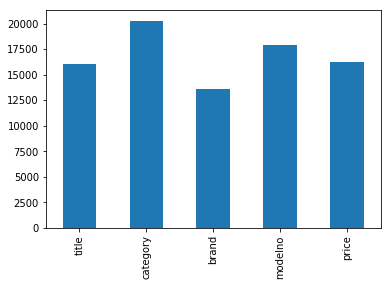

In [24]:
ri_sums = negatives_variation_df.sum(numeric_only=True)
ri_sums.plot.bar()

In [26]:
attribute_lenght= len(attributes)
positive_samples_ri_matrix = []
current_sample = 0

for batch in positive_classifier_inputs:
    for index in range(len(batch)):
        current_sample_ris = []
        for j,attribute in enumerate(attributes):
            print('Processing sample {} with attribute {}'.format(current_sample,attribute))
            it,variation = find_smallest_variation_to_change(model.classifier,900,attribute_length,
                                                             batch,index,[j],0)
            current_sample_ris.append(variation)
        positive_samples_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0 with attribute title
Processing sample 0 with attribute category
Processing sample 0 with attribute brand
Processing sample 0 with attribute modelno
Processing sample 0 with attribute price
Processing sample 1 with attribute title
Processing sample 1 with attribute category
Processing sample 1 with attribute brand
Processing sample 1 with attribute modelno
Processing sample 1 with attribute price
Processing sample 2 with attribute title
Processing sample 2 with attribute category
Processing sample 2 with attribute brand
Processing sample 2 with attribute modelno
Processing sample 2 with attribute price
Processing sample 3 with attribute title
Processing sample 3 with attribute category
Processing sample 3 with attribute brand
Processing sample 3 with attribute modelno
Processing sample 3 with attribute price
Processing sample 4 with attribute title
Processing sample 4 with attribute category
Processing sample 4 with attribute brand
Processing sample 4 with attribute

Processing sample 39 with attribute modelno
Processing sample 39 with attribute price
Processing sample 40 with attribute title
Processing sample 40 with attribute category
Processing sample 40 with attribute brand
Processing sample 40 with attribute modelno
Processing sample 40 with attribute price
Processing sample 41 with attribute title
Processing sample 41 with attribute category
Processing sample 41 with attribute brand
Processing sample 41 with attribute modelno
Processing sample 41 with attribute price
Processing sample 42 with attribute title
Processing sample 42 with attribute category
Processing sample 42 with attribute brand
Processing sample 42 with attribute modelno
Processing sample 42 with attribute price
Processing sample 43 with attribute title
Processing sample 43 with attribute category
Processing sample 43 with attribute brand
Processing sample 43 with attribute modelno
Processing sample 43 with attribute price
Processing sample 44 with attribute title
Processing s

Processing sample 79 with attribute category
Processing sample 79 with attribute brand
Processing sample 79 with attribute modelno
Processing sample 79 with attribute price
Processing sample 80 with attribute title
Processing sample 80 with attribute category
Processing sample 80 with attribute brand
Processing sample 80 with attribute modelno
Processing sample 80 with attribute price
Processing sample 81 with attribute title
Processing sample 81 with attribute category
Processing sample 81 with attribute brand
Processing sample 81 with attribute modelno
Processing sample 81 with attribute price
Processing sample 82 with attribute title
Processing sample 82 with attribute category
Processing sample 82 with attribute brand
Processing sample 82 with attribute modelno
Processing sample 82 with attribute price
Processing sample 83 with attribute title
Processing sample 83 with attribute category
Processing sample 83 with attribute brand
Processing sample 83 with attribute modelno
Processin

Processing sample 117 with attribute category
Processing sample 117 with attribute brand
Processing sample 117 with attribute modelno
Processing sample 117 with attribute price
Processing sample 118 with attribute title
Processing sample 118 with attribute category
Processing sample 118 with attribute brand
Processing sample 118 with attribute modelno
Processing sample 118 with attribute price
Processing sample 119 with attribute title
Processing sample 119 with attribute category
Processing sample 119 with attribute brand
Processing sample 119 with attribute modelno
Processing sample 119 with attribute price
Processing sample 120 with attribute title
Processing sample 120 with attribute category
Processing sample 120 with attribute brand
Processing sample 120 with attribute modelno
Processing sample 120 with attribute price
Processing sample 121 with attribute title
Processing sample 121 with attribute category
Processing sample 121 with attribute brand
Processing sample 121 with attr

Processing sample 154 with attribute modelno
Processing sample 154 with attribute price
Processing sample 155 with attribute title
Processing sample 155 with attribute category
Processing sample 155 with attribute brand
Processing sample 155 with attribute modelno
Processing sample 155 with attribute price
Processing sample 156 with attribute title
Processing sample 156 with attribute category
Processing sample 156 with attribute brand
Processing sample 156 with attribute modelno
Processing sample 156 with attribute price
Processing sample 157 with attribute title
Processing sample 157 with attribute category
Processing sample 157 with attribute brand
Processing sample 157 with attribute modelno
Processing sample 157 with attribute price
Processing sample 158 with attribute title
Processing sample 158 with attribute category
Processing sample 158 with attribute brand
Processing sample 158 with attribute modelno
Processing sample 158 with attribute price
Processing sample 159 with attri

Processing sample 192 with attribute category
Processing sample 192 with attribute brand
Processing sample 192 with attribute modelno
Processing sample 192 with attribute price


In [28]:
ri_norms_positive_samples = []
for ri_list in positive_samples_ri_matrix:
    ri_norms_positive_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [29]:
positives_variation_df = pd.DataFrame(data= ri_norms_positive_samples,columns=attributes)

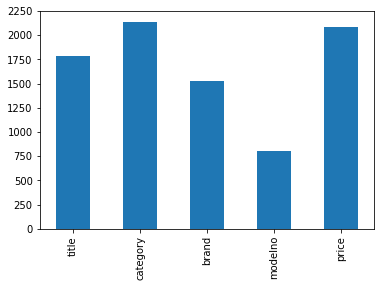

In [30]:
ri_sums = positives_variation_df.sum(numeric_only=True)
ri_sums.plot.bar()